**IMPORTING THE lIBRARIES**

In [453]:
import pandas as pd
from tensorflow.keras.layers import Bidirectional,LSTM,Dense,Embedding,Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import text,sequence
from wordcloud import WordCloud

**READ THE DATA**


In [353]:
df=pd.read_csv('Corona_NLP_train.csv',engine='python')

In [354]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [355]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [487]:
def n(sentiment):
  text = ",".join(review for review in df[df['Sentiment'] == sentiment].OriginalTweet 
        if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
  wc=WordCloud(max_words=200,background_color='white').generate(text)
  plt.figure(figsize=(10,15))
  plt.imshow(wc)
  plt.title(sentiment,fontsize=20)

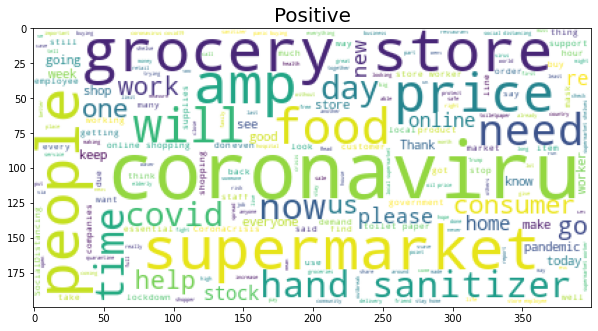

In [488]:

n('Positive')

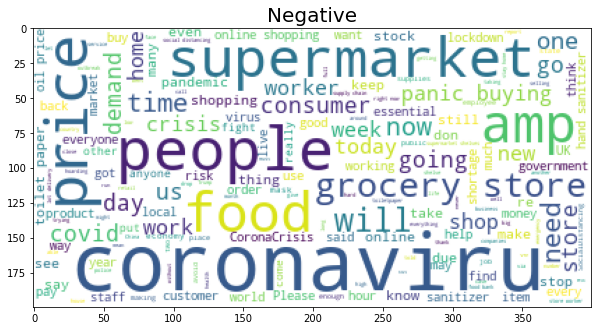

In [489]:
n('Negative')

In [356]:
df.drop('Location',axis=1,inplace=True)

In [381]:
x=df.drop('Sentiment',axis=1)

In [368]:
y=df['Sentiment']

In [372]:
y.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [371]:
y=y.replace({"Extremely Positive":"Positive","Extremely Negative":"Negative"})

In [373]:
y=pd.get_dummies(y)

In [374]:
y

,Negative,Neutral,Positive
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
41152,0,1,0
41153,1,0,0
41154,0,0,1
41155,0,1,0


In [398]:
x_f=df['OriginalTweet']
for i in range(0,len(x_f)):
  temp=x_f[i]
  temp=re.sub("@\S+", " ", temp)
  temp=re.sub("https*\S+", " ", temp)
  temp=re.sub("#\S+", " ", temp)
  temp=re.sub("\'\w+", '', temp)
  temp=re.sub('[%s]' % re.escape(string.punctuation), ' ', temp)
  temp=re.sub(r'\w*\d+\w*', '', temp)
  temp=re.sub('\s{2,}', " ", temp)

In [399]:
x_f

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know its getting tough when @KameronWilds...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [402]:
tokenizer=Tokenizer(num_words=1000)

In [406]:
tokenizer.fit_on_texts(x_f)

In [407]:
seq=tokenizer.texts_to_sequences(x_f)

In [409]:
x=pad_sequences(seq,maxlen=100,padding='pre')

In [410]:
x

array([[  0,   0,   0, ...,   7,   4,   5],
       [  0,   0,   0, ...,  41, 115, 250],
       [  0,   0,   0, ...,   7,   4,   5],
       ...,
       [  0,   0,   0, ...,  85,  72,  46],
       [  0,   0,   0, ...,  11,  38,  11],
       [  0,   0,   0, ...,  45,   2,  18]], dtype=int32)

In [413]:
type(x)

numpy.ndarray

In [415]:
y=np.array(y)

In [416]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [428]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               112800    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 603       
Total params: 313,403
Trainable params: 313,403
Non-trainable params: 0
_________________________________________________________________
None


In [429]:
history=model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
965/965 [==============================] - 120s 121ms/step - loss: 0.7775 - accuracy: 0.6467 - val_loss: 0.6534 - val_accuracy: 0.7351
Epoch 2/15
965/965 [==============================] - 116s 120ms/step - loss: 0.6409 - accuracy: 0.7418 - val_loss: 0.6495 - val_accuracy: 0.7340
Epoch 3/15
965/965 [==============================] - 116s 120ms/step - loss: 0.6242 - accuracy: 0.7508 - val_loss: 0.6491 - val_accuracy: 0.7396
Epoch 4/15
965/965 [==============================] - 117s 121ms/step - loss: 0.6127 - accuracy: 0.7542 - val_loss: 0.6335 - val_accuracy: 0.7417
Epoch 5/15
965/965 [==============================] - 117s 121ms/step - loss: 0.5972 - accuracy: 0.7592 - val_loss: 0.6394 - val_accuracy: 0.7417
Epoch 6/15
965/965 [==============================] - 116s 120ms/step - loss: 0.5813 - accuracy: 0.7665 - val_loss: 0.6294 - val_accuracy: 0.7427
Epoch 7/15
965/965 [==============================] - 116s 120ms/step - loss: 0.5663 - accuracy: 0.7738 - val_loss: 0.6359 -

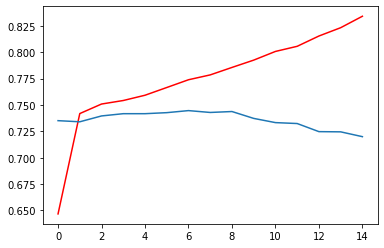

In [452]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,color='r')
plt.plot(epochs,val_acc)

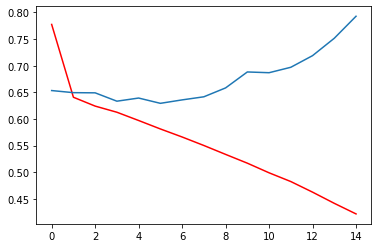

In [451]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,loss,color='r')
plt.plot(epochs,val_loss)
